<a href="https://colab.research.google.com/github/Susanarias/TAREA2/blob/main/4_Analyzing_prices_using_the_AR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Index_modified.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

The ACF

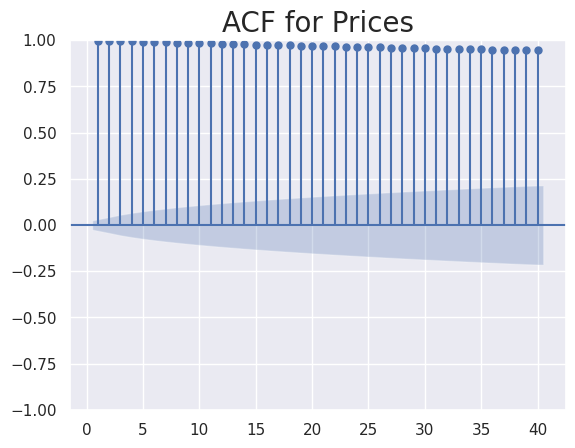

In [ ]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

The PACF

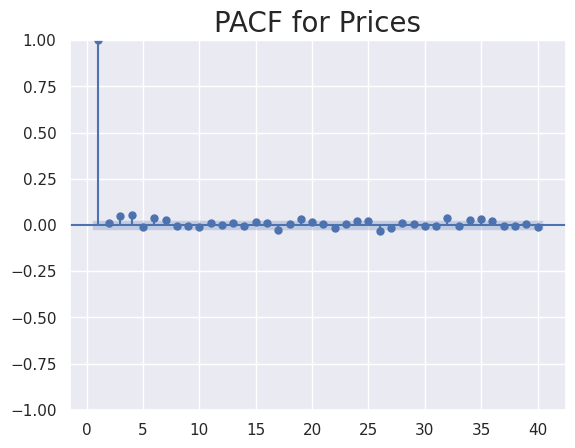

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

The AR(1) Model

In [ ]:
model_ar = ARIMA(df.market_value, order=(1,0,0))

In [ ]:
results_ar = model_ar.fit()

In [ ]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34091.337
Date:                Sun, 15 Oct 2023   AIC                          68188.675
Time:                        01:46:22   BIC                          68208.877
Sample:                    01-07-1994   HQIC                         68195.678
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8120    531.703     10.158      0.000    4358.694    6442.930
ar.L1          0.9989      0.001   1369.476      0.000       0.997       1.000
sigma2      3431.0066     36.719     93.440      0.000    3359.039    3502.974
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              3574.02
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Higher-Lag AR Models

In [ ]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -34091.204
Date:                Sun, 15 Oct 2023   AIC                          68190.408
Time:                        02:05:38   BIC                          68217.343
Sample:                    01-07-1994   HQIC                         68199.745
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    454.748     11.876      0.000    4509.521    6292.101
ar.L1          0.9900      0.009    112.087      0.000       0.973       1.007
ar.L2          0.0087      0.009      0.983      0.326      -0.009       0.026
sigma2      3430.5257     36.829     93.148      0.000    3358.342    3502.709
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3556.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34084.376
Date:                Sat, 14 Oct 2023   AIC                          68178.752
Time:                        21:38:25   BIC                          68212.422
Sample:                    01-07-1994   HQIC                         68190.424
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    471.222     11.461      0.000    4477.232    6324.390
ar.L1          0.9897      0.009    111.398      0.000       0.972       1.007
ar.L2         -0.0378      0.012     -3.120      0.002      -0.062      -0.014
ar.L3          0.0469      0.008      5.638      0.000       0.031       0.063
sigma2      3423.3942     36.796     93.038      0.000    3351.276    3495.512
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3567.00
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.22
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34075.365
Date:                Sat, 14 Oct 2023   AIC                          68162.731
Time:                        21:39:11   BIC                          68203.134
Sample:                    01-07-1994   HQIC                         68176.737
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    489.118     11.042      0.000    4442.157    6359.465
ar.L1          0.9871      0.009    110.400      0.000       0.970       1.005
ar.L2         -0.0358      0.012     -2.930      0.003      -0.060      -0.012
ar.L3         -0.0064      0.011     -0.560      0.576      -0.029       0.016
ar.L4          0.0539      0.008      6.586      0.000       0.038       0.070
sigma2      3413.6890     37.468     91.108      0.000    3340.252    3487.126
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3379.86
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.27
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

LLR Test

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Comparing Higher-Lag AR Models

In [ ]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [ ]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [ ]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34075.365
Date:                Sat, 14 Oct 2023   AIC                          68162.731
Time:                        21:40:35   BIC                          68203.134
Sample:                    01-07-1994   HQIC                         68176.737
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    489.118     11.042      0.000    4442.157    6359.465
ar.L1          0.9871      0.009    110.400      0.000       0.970       1.005
ar.L2         -0.0358      0.012     -2.930      0.0

In [ ]:
model_ar_5 = ARIMA(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -34075.125
Date:                Sat, 14 Oct 2023   AIC                          68164.250
Time:                        21:41:04   BIC                          68211.388
Sample:                    01-07-1994   HQIC                         68180.591
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    485.953     11.114      0.000    4448.360    6353.262
ar.L1          0.9876      0.009    110.366      0.000       0.970       1.005
ar.L2         -0.0358      0.012     -2.935      0.0

In [ ]:
model_ar_6 = ARIMA(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -34070.400
Date:                Sat, 14 Oct 2023   AIC                          68156.800
Time:                        21:41:25   BIC                          68210.672
Sample:                    01-07-1994   HQIC                         68175.476
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    504.096     10.714      0.000    4412.801    6388.821
ar.L1          0.9880      0.009    109.377      0.000       0.970       1.006
ar.L2         -0.0383      0.012     -3.106      0.0

In [ ]:
model_ar_7 = ARIMA(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -34067.910
Date:                Sat, 14 Oct 2023   AIC                          68153.820
Time:                        21:41:46   BIC                          68214.425
Sample:                    01-07-1994   HQIC                         68174.830
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    515.321     10.480      0.000    4390.801    6410.821
ar.L1          0.9869      0.009    108.404      0.000       0.969       1.005
ar.L2         -0.0370      0.012     -2.957      0.0

In [ ]:
model_ar_8 = ARIMA(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6210
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -34067.806
Date:                Sat, 14 Oct 2023   AIC                          68155.611
Time:                        21:42:05   BIC                          68222.950
Sample:                    01-07-1994   HQIC                         68178.955
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5400.8110    517.247     10.441      0.000    4387.025    6414.597
ar.L1          0.9871      0.009    108.370      0.000       0.969       1.005
ar.L2         -0.0369      0.013     -2.949      0.0

In [ ]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


Analysing the Residuals

In [ ]:
df['res_price'] = results_ar_7.resid

In [ ]:
df.res_price.mean()

0.4527681995082276

In [ ]:
df.res_price.var()

4019.5805463606803

In [ ]:
sts.adfuller(df.res_price)

(-85.55480210672395,
 0.0,
 0,
 6209,
 {'1%': -3.4314036327194968,
  '5%': -2.8620056116849666,
  '10%': -2.567017842230278},
 67771.97735246409)

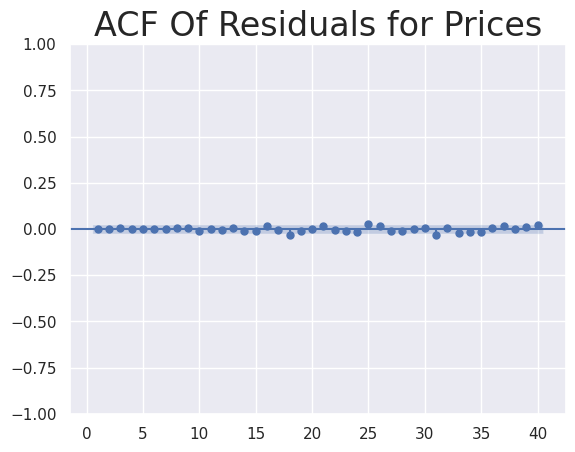

In [ ]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

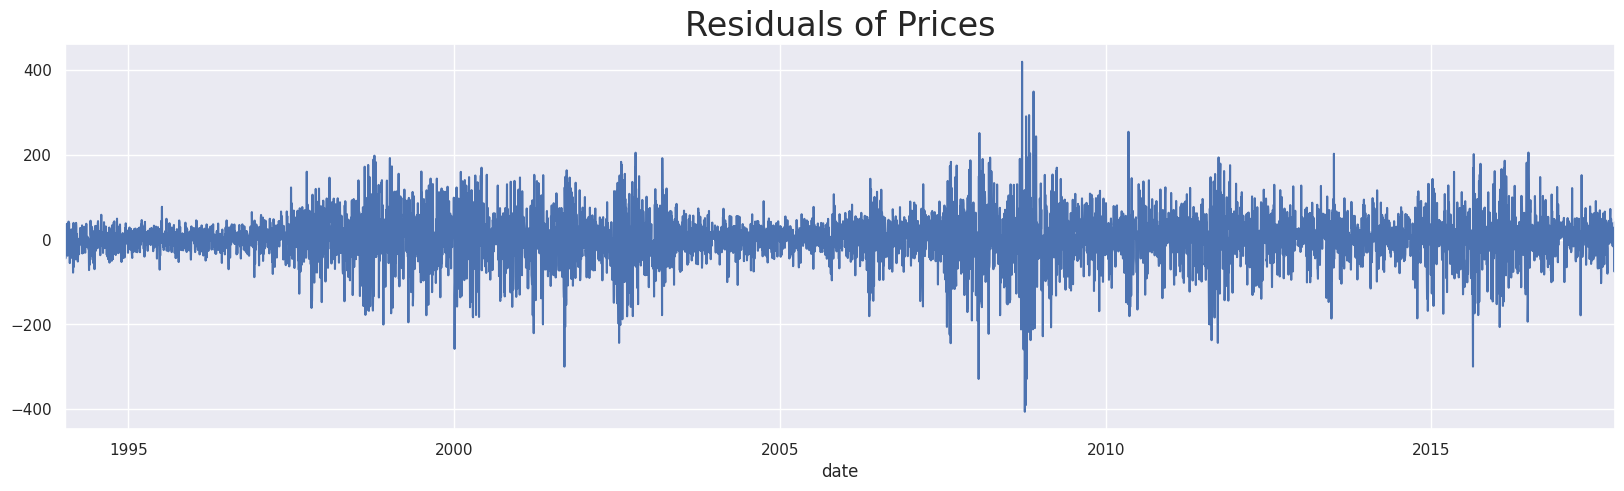

In [ ]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()